# Workshop 2 b - Matplotlib 
Part of this tutorial is based on the NumPy and Matplotlib documentation (https://numpy.org/doc/stable/ and https://matplotlib.org/stable/contents.html). Also, part of this tutorial is based on the Python introduction from last year of André Jüling, created under the BSD 3-Clause License (https://github.com/AJueling/python_climate_physics).

We just learned how to create and manipulate arrays with NumPy.
At this point you might be getting curious what these arrays "look" like. So we need to introduce some way to visualize data. Matplotlib is the standard Python plotting library. It has a lot of options, we will walk through some of them, so you get an idea of what is possible, but just remember that a lot more is possible!

For an overview of all kinds of plots you can make with Matplotlib , for example, scatter plots, bar charts, histograms, ... check out their excellent gallery: 
[Matplotlib Gallery link](https://matplotlib.org/gallery/index.html)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
# this is necessary to see plots in the cell output field

Here you see a different way of importing packages `from [] import [] as []`, this is useful of you want to use a certain module only. The `pyplot` of `matplotlib` module covers all out basic plotting needs.

In [2]:
# recreate arrays we left with in the previous notebook
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = np.linspace(-np.pi, np.pi, 50)
xx, yy = np.meshgrid(x, y)
xx.shape, yy.shape
f = np.sin(xx) * np.cos(0.5*yy)
g = f * x

# apply on just one axis
g_ymean = g.mean(axis=0)
g_xmean = g.mean(axis=1)

# 1D plots: lines and scatters
We start with 1D plots, i.e. lines and scatter plots. Line plots are made with the command `plt.plot(x,y)` and scatter plots with `plt.scatter(x,y)`. It is important that `x` and `y` are arrays with the same length. There are many options to 'style' your plot with axes labels, titles, colours, symbols etc.

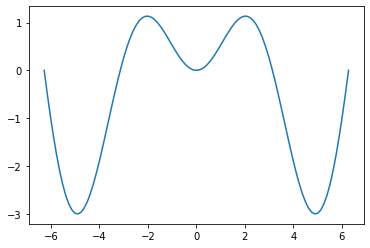

In [3]:
# basic plot
plt.plot(x,g_ymean)

ValueError: x and y must have same first dimension, but have shapes (100,) and (50,)

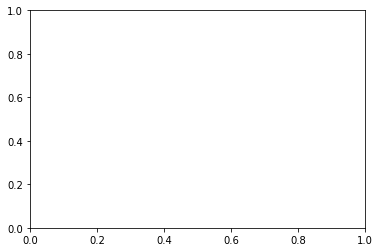

In [4]:
# why do we get an error here?
plt.plot(x,g_xmean)

In [ ]:
# styling your plot
plt.plot(x,g_ymean,'r') # plot in red
plt.xlabel('x')  # label x-axis
plt.ylabel('mean(g)') # label y-axis
plt.title('Here you put a title') # title
plt.grid() # grid lines

### Colors
There is a range of named colors in matplotlib:

- b: blue
- g: green
- r: red
- c: cyan
- m: magenta
- y: yellow
- k: black
- w: white

If you don't specify a colour yourself, Python will give it a colour itself, and it will become different if you put multiple lines in one plot. Below we have an example of plots with multiple lines, you can add a label to each line, these will show up if you add a legend `plt.legend()`

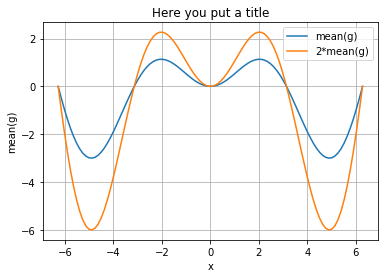

In [5]:
plt.plot(x,g_ymean,label='mean(g)') # add labels to multiple lines in one plot
plt.plot(x,g_ymean*2,label='2*mean(g)') 
plt.legend() # to make the labels visible, 
plt.xlabel('x')  # label x-axis
plt.ylabel('mean(g)') # label y-axis
plt.title('Here you put a title') # title
plt.grid() # grid lines

Except for the color, you can also change the linestyle and the linewidth:

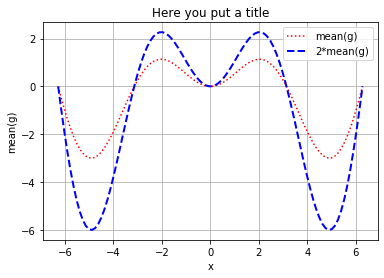

In [6]:
plt.plot(x,g_ymean,':r',label='mean(g)') # add labels to multiple lines in one plot
plt.plot(x,g_ymean*2,'b',linestyle='--',linewidth=2,label='2*mean(g)') 
plt.legend() # to make the labels visible, 
plt.xlabel('x')  # label x-axis
plt.ylabel('mean(g)') # label y-axis
plt.title('Here you put a title') # title
plt.grid() # grid lines

The same characteristics hold for scatter-plots. But here you can also change the markers, markercolors and markersize. Some examples are shown below and take a look at all the possible markers [all the possible markers](https://matplotlib.org/api/markers_api.html) available in Matplotlib!

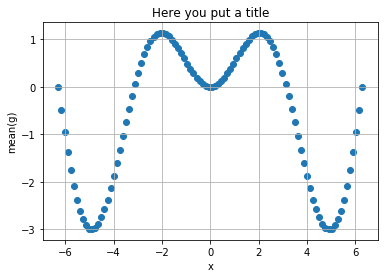

In [7]:
# basic scatter plot
plt.scatter(x,g_ymean)
plt.xlabel('x')  # label x-axis
plt.ylabel('mean(g)') # label y-axis
plt.title('Here you put a title') # title
plt.grid() # grid lines

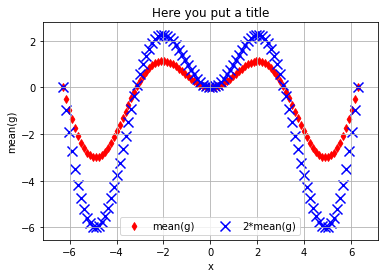

In [8]:
# styled scatter plot
plt.scatter(x,g_ymean,30,'r','d',label='mean(g)')
plt.scatter(x,g_ymean*2,100,'b','x',label='2*mean(g)') 
plt.legend(ncol=2)
plt.xlabel('x')  # label x-axis
plt.ylabel('mean(g)') # label y-axis
plt.title('Here you put a title') # title
plt.grid() # grid lines

Sometimes you want to focus on a certain part of a plot. Then you can specify the limits of the axis with `plt.xlim(lower,upper)` and `plt.ylim(lower,upper)`. An example of this is shown below.

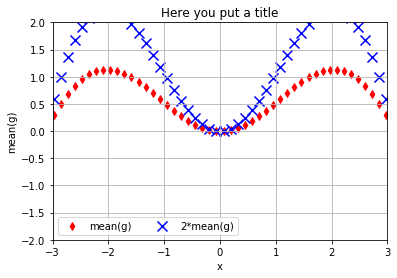

In [9]:
# styled scatter plot
plt.scatter(x,g_ymean,30,'r','d',label='mean(g)')
plt.scatter(x,g_ymean*2,100,'b','x',label='2*mean(g)') 
plt.legend(ncol=2)
plt.xlim(-3,3) # set limits to x-axis
plt.ylim(-2,2)
plt.xlabel('x')  # label x-axis
plt.ylabel('mean(g)') # label y-axis
plt.title('Here you put a title') # title
plt.grid() # grid lines

You can manually adjust the axes by changing the amount of ticks with `plt.xticks` and `plt.yticks`. Here you can also change the labels of the ticks. An example is given below:

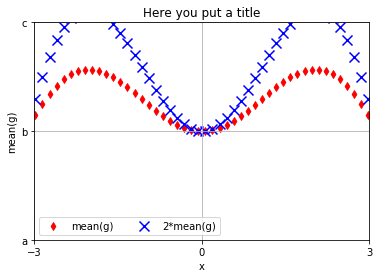

In [10]:
# styled scatter plot
plt.scatter(x,g_ymean,30,'r','d',label='mean(g)')
plt.scatter(x,g_ymean*2,100,'b','x',label='2*mean(g)') 
plt.xticks([-3,0,3])
plt.yticks([-2,0,2],labels=['a','b','c'])
plt.legend(ncol=2)
plt.xlim(-3,3) # set limits to x-axis
plt.ylim(-2,2)
plt.xlabel('x')  # label x-axis
plt.ylabel('mean(g)') # label y-axis
plt.title('Here you put a title') # title
plt.grid() # grid lines

## 2D plots: contourplots

Often our data has more than one dimension and we can visualize this by contourplots. There are several ways to do this, we will discuss a few options here. We will also discuss colorbars, different colormaps etcetera.

- __contourlines (not filled)__ = `plt.contour`
- __filled contourlines__ = `plt.pcolormesh, plt.contourf, plt.pcolor`. All of these functions determine isolines, between which the colour is the same. The output of these commands looks almost the same, but there are differences in how they handle data and how they determine the isolines. `plt.pcolormesh` is usually the most efficient, so that is usually a safe options. Here, some of the [differences](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pcolormesh.html#differences-pcolor-pcolormesh) are discussed. 

All of these commands use input of the type `(x,y,z)`, where `x` and `y` are the grid and `z` is the value at each gridpoint. Note that the shapes of need `(x,y,z)` to be the same. You don't necessarily have to specify `x` and `y`. If you don't do that, the axis don't have units, but just show the amount of elements in `z` in each direction.

If you want to highlight certain contourlines, it is best to use plt.contour and plt.contourf together, because they are the most similar in how they handle data and isolines. Another advantage of `plt.contourf` is that you can easily adjust the amount of levels (the amount of isolines). Of course, the more isolines you add, the slower the code becomes.

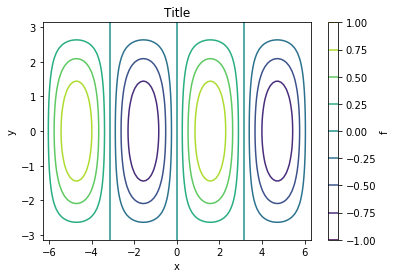

In [11]:
plt.contour(xx,yy,f)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Title')
plt.colorbar(label='f')

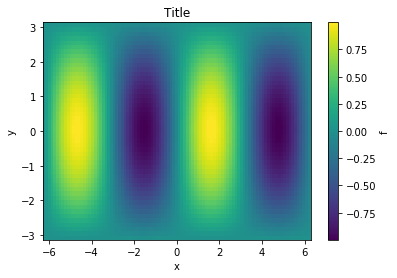

In [12]:
plt.pcolormesh(xx,yy,f)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Title')
plt.colorbar(label='f') # colorbar + label


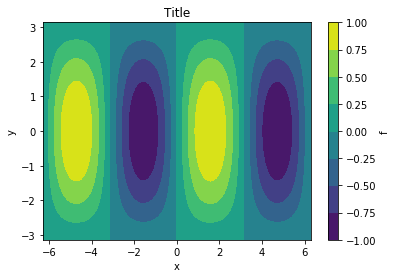

In [13]:
plt.contourf(xx,yy,f)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Title')
plt.colorbar(label='f')

Text(0.5, 1.0, 'Title')

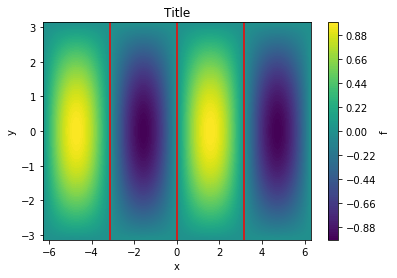

In [14]:
# increase the amount of levels and highlight the 0-isoline
plt.contourf(xx,yy,f,100) # 100 isolines
plt.colorbar(label='f') # put colorbar command before plt.contour, otherwise it doesn't show the right one
plt.contour(xx,yy,f,levels=[0],colors='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Title')

TypeError: Dimensions of C (100, 50) are incompatible with X (100) and/or Y (50); see help(pcolormesh)

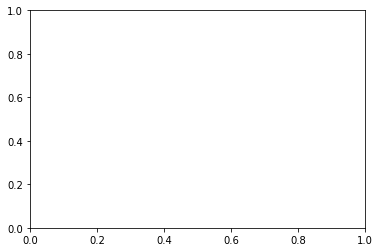

In [15]:
# pay attention to the shapes of the input variables
# transpose f --> we will get an error
plt.pcolormesh(xx,yy,f.T)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='f')

Text(0.5, 1.0, 'Title')

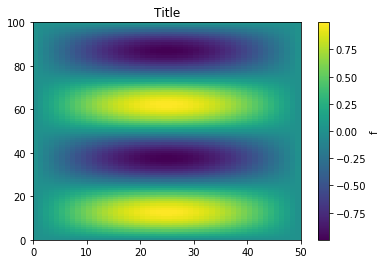

In [16]:
# We can do this if we don't specify x and y
# transpose f 
plt.pcolormesh(f.T)
plt.colorbar(label='f')
plt.title('Title')
# now the axes don't have units, but just show the size of f

Just as you can change the color of the lines/scatters in 1D plots, you can change the colormap in 2D plots. There are a lot of built-in colormaps available (https://matplotlib.org/stable/tutorials/colors/colormaps.html), you can also specify your own manually. Below we have given an example of the same plot with a different colormap.

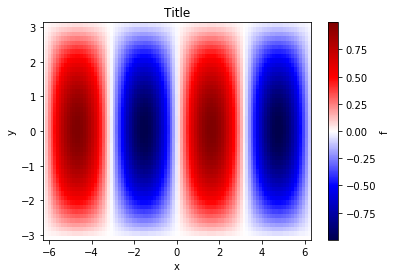

In [17]:
plt.pcolormesh(xx,yy,f,cmap='seismic')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Title')
plt.colorbar(label='f') # colorbar + label

# Object-oriented plotting and subplots
We introduced Matplotlib in the previous section and used the syntax `plt.some_function()` to create and customize plots. This is called the `pyplot` style and is one of two coding styles. The second, which you will come across in examples, is the so-called object-oriented approach. For this it is important to understand how plots are represented in Matplotlib.

There are two important object types in a matplotlib plot:
1. the figure, is essentially the canvas that is drawn on
2. the axes, represents a single plot and is where data is plotted, there can be multiple axes in a figure (don't confuse this with the word "axis", which refers to the x/y axis of a plot).

The advantage of the object-oriented approach is that is is more explicit and can be easier to write and read when the figures become more complex.

__We recommend that you use this style to create figures, even if they only contain only a single axes object, then you can easily use the object oriented coding style__

This is especially useful if you make plots that consist of multiple subplots, then you can easily adjust the properties of a single subplot in a larger figure. Subplots can be made with the command `plt.subplot()`.

Below we give some examples on how to use this object-oriented plotting and make subplots. 

In [18]:
a = np.arange(0, 10, 0.2)
b = np.sin(a)

(0, 1)

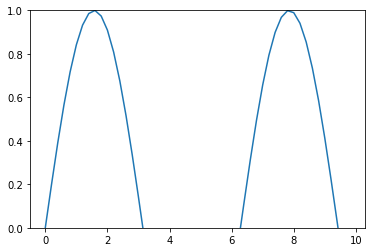

In [19]:
plt.plot(a,b)
plt.ylim((0,1))

(-0.5, 0.8)

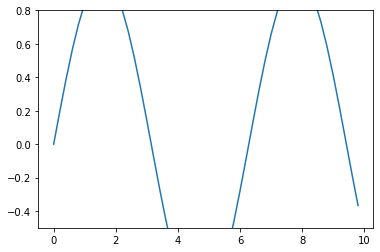

In [20]:
# here we create a figure and one axes explicitely
fig = plt.figure()
ax = plt.axes()
ax.plot(a,b)
ax.set_ylim((-.5,.8))

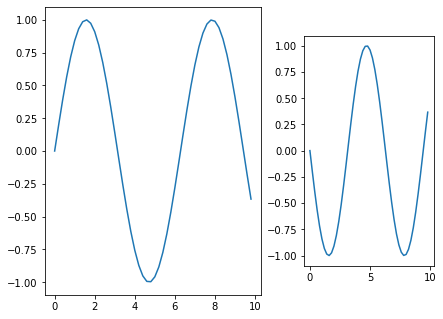

In [21]:
# we can explicitely create an axes object and set the location
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 0.5, 1]) # [left, bottom, width, height]
ax2 = fig.add_axes([0.6, .1, 0.3, .8])
ax1.plot(a,b)
ax2.plot(a,-b)

(-0.5, 0.8)

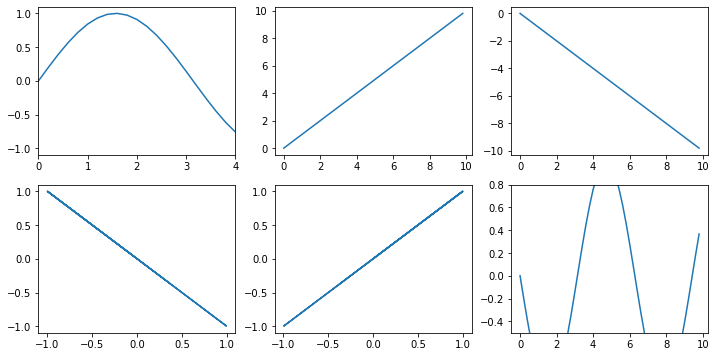

In [22]:
# plt.subplots creates the figure and an array of axes in one line
fig = plt.figure(figsize=(12, 6))
axes = fig.subplots(nrows=2, ncols=3)
axes[0,0].plot(a,b)
axes[0,1].plot(a,a)
axes[0,2].plot(a,-a)
axes[1,0].plot(-b,b)
axes[1,1].plot(b,b)
axes[1,2].plot(a,-b)
axes[0,0].set_xlim((0,4))    # we can change the characteristics of each subplot individually
axes[1,2].set_ylim((-.5,.8))

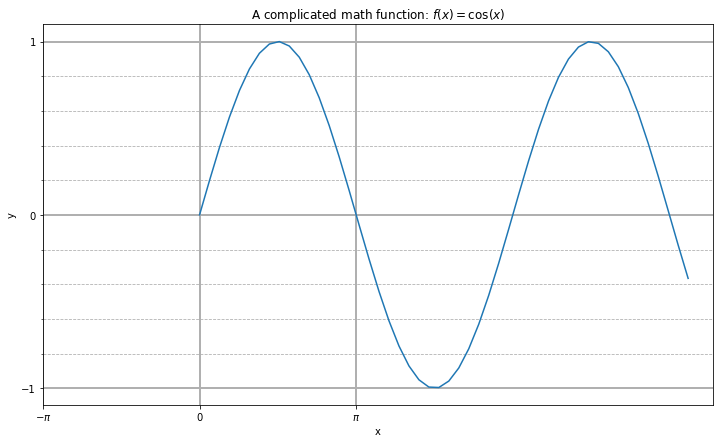

In [23]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(a, b)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(r'A complicated math function: $f(x) = \cos(x)$')

ax.set_xticks(np.pi * np.array([-1, 0, 1]))
ax.set_xticklabels([r'$-\pi$', '0', r'$\pi$'])
ax.set_yticks([-1, 0, 1])

ax.set_yticks(np.arange(-1, 1.1, 0.2), minor=True)
#ax.set_xticks(np.arange(-3, 3.1, 0.2), minor=True)

ax.grid(which='minor', linestyle='--')
ax.grid(which='major', linewidth=2)

Like we already mentioned, there are many more kinds of plots available which can be found in this gallery: 
### [Matplotlib Gallery link](https://matplotlib.org/gallery/index.html)
Some important ones, that we often use in Climate Physics are quiver plots (vector plots) and plots of streamlines. Some examples are given below:

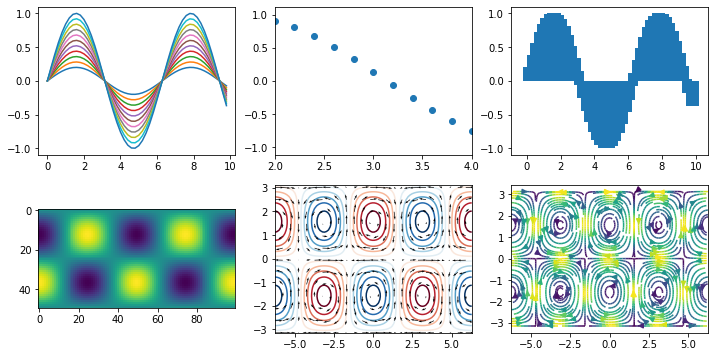

In [24]:
f, ax = plt.subplots(2, 3, figsize=(12,6))

x1d = np.linspace(-2*np.pi, 2*np.pi, 100)
y1d = np.linspace(-np.pi, np.pi, 50)
xx, yy = np.meshgrid(x1d, y1d)
f = np.cos(xx) * np.sin(yy)

for factor in np.linspace(0.2, 1, 11):
    ax[0,0].plot(a, factor*b)
ax[0,1].scatter(a, b)
ax[0,2].bar(a, b)
ax[0,1].set_xlim((2,4))
ax[1,0].imshow(f)


u = -np.cos(xx) * np.cos(yy)
v = -np.sin(xx) * np.sin(yy)
clevels = np.arange(-1, 1, 0.2) + 0.1


ax[1,1].contour(xx, yy, f, clevels, cmap='RdBu_r', extend='both', zorder=0)
ax[1,1].quiver(xx[::4, ::4], yy[::4, ::4],
           u[::4, ::4], v[::4, ::4], zorder=1)
ax[1,2].streamplot(xx, yy, u, v, density=2, color=(u**2 + v**2))

## <span style="color:blue">Exercises</span>
1. Line plots: Create a figure of several lines $\sin(x)$, $\cos(x)$, $\sqrt x$ for $x\in[0,\pi]$ using different line styles (see the plt.plot docstring). Add labels to the axes, give it a title, and create a legend.
<img src="Figures/2b1.png" width="600">

2. Create a histogram of 1000 samples of a normal distribution. Set the bin size to 0.5. Save the figure as `normal.png` using the `plt.savefig()` function.
<img src="Figures/2b2.png" width="600">

3. Create a scatter plot of 1000 random data points and color them according to their angle.
<img src="Figures/2b3.png" width="600">

4. Make a (filled) contour plot of $z = cos(x)-sin(y)$ for $x \in [-2\pi,2\pi]$ and $y\in[-\pi,\pi]$. Add a colorbar and highlight the 0-contour.
<img src="Figures/2b4.png" width="600">

 5. Make a vector plot (quiver) for  $x \in [-2\pi,2\pi]$ and $y\in[-\pi,\pi]$ and 
 $ u= \cos(x)$ and $v=\sin(y) $. In the background, plot in contours the magnitude:
 $\sqrt{u^2+v^2}$ 
 <img src="Figures/2b5.png" width="600">

6. Combine the plots from questions 4 and 5 into one figure with two subplots. Make sure that both subplots have a colorbar and axes labels.
<img src="Figures/2b6.png" width="1000">

7. Create a 2D histogram of a Normal distribution. Change the colormap.
<img src="Figures/2b7.png" width="600">

## <span style="color:green">Solutions</span>
Again, these are possible solutions.

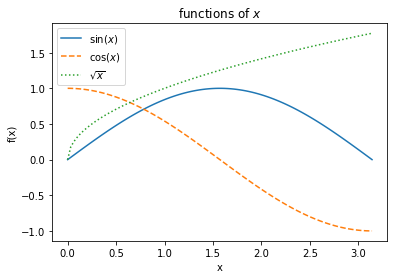

In [25]:
# 1. Line plots: Create a figure of several lines $\sin(x)$, 
#$\cos(x)$, $\sqrt x$ for $x\in[0,\pi]$ using different line 
# styles (see the plt.plot docstring). Add labels to the axes, 
# give it a title, and create a legend.
x = np.linspace(0, np.pi, 100)
plt.plot(x, np.sin(x), label=r'$\sin(x)$', ls='-')
plt.plot(x, np.cos(x), label=r'$\cos(x)$', ls='--')
plt.plot(x, np.sqrt(x), label=r'$\sqrt{x}$', ls=':')
plt.title(r'functions of $x$')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.savefig('Figures/2b1.png')

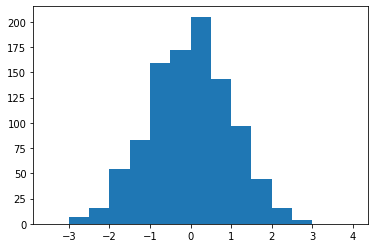

In [26]:
# 2. Create a histogram of 1000 samples of a normal distribution. 
# Set the bin size to 05.
# Save the figure as `normal.png` using the `plt.savefig()` function.
x = np.random.standard_normal(1000)
plt.hist(x, bins=np.arange(-3.5,4.1,.5))
plt.savefig('Figures/2b2.png')

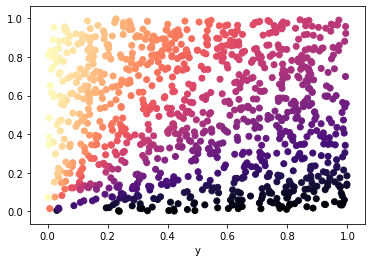

In [27]:
# 3. Create a scatter plot of 1000 random data points and 
# color them according to their angle.
x = np.random.rand(1000)
y = np.random.rand(1000)
angle = np.arctan(y/x)
plt.scatter(x=x, y=y, c=angle, cmap='magma')
plt.xlabel('x')
plt.xlabel('y')
plt.savefig('Figures/2b3.png')

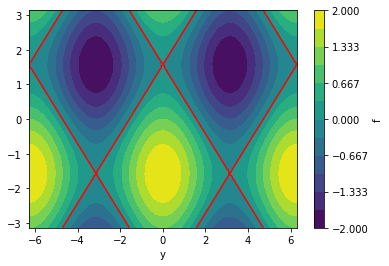

In [28]:
# 4. Recreate the first plot, but now as a filled contour plot.
# Add a colorbar.
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = np.linspace(-np.pi, np.pi, 50)
xx, yy = np.meshgrid(x, y)
f = np.cos(xx) - np.sin(yy)
plt.contourf(xx, yy, f, levels=np.linspace(-2,2,13))
plt.colorbar(label='f')
plt.contour(xx, yy, f, levels=[0],colors='r')
plt.xlabel('x')
plt.xlabel('y')
plt.savefig('Figures/2b4.png')

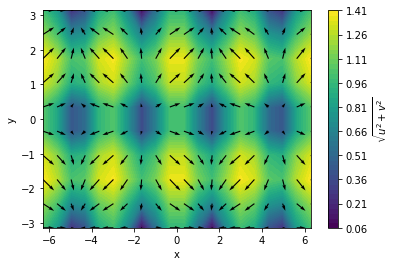

In [29]:
# 5. Make a vector plot (quiver) for  $x \in [-2\pi,2\pi]$ and $y\in[-\pi,\pi]$ and 
# $ u= \cos(x)$ and $v=\sin(y) $. In the background, plot in contours the magnitude:
# $\sqrt{u^2+v^2}$
x2 = np.linspace(-2*np.pi, 2*np.pi, 20)
y2 = np.linspace(-np.pi, np.pi, 10)
xx2, yy2 = np.meshgrid(x2, y2)
u = np.cos(xx2) 
v = np.sin(yy2) 
magn = np.sqrt(u**2+v**2)

plt.contourf(xx2,yy2,magn,50)
plt.colorbar(label=r'$\sqrt{u^2+v^2}$')
plt.quiver(xx2, yy2, u,v)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('Figures/2b5.png')

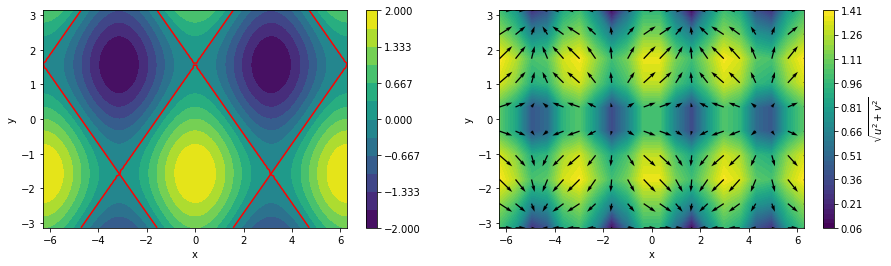

In [30]:
# 6. Combine the plots from questions 4 and 5 into one subplot. Add colorbars to each plot and label the axes.
fig, ax = plt.subplots(1, 2, figsize=(15,4))
fig1=ax[0].contourf(xx, yy, f, levels=np.linspace(-2,2,13))
ax[0].contour(xx, yy, f, levels=[0],colors='r')
fig.colorbar(fig1, ax=ax[0])
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

fig2=ax[1].contourf(xx2,yy2,magn,50)
ax[1].quiver(xx2, yy2, u,v)
fig.colorbar(fig2, ax=ax[1],label=r'$\sqrt{u^2+v^2}$')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
plt.savefig('Figures/2b6.png')

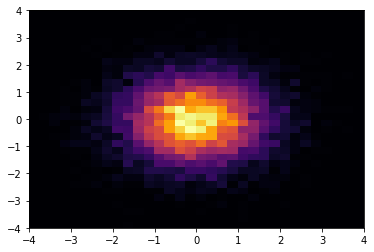

In [31]:
# 7. Create a 2D histogram of a Normal distribution.
# Change the colormap.
x = np.random.standard_normal(10000)
y = np.random.standard_normal(10000)
bins = np.linspace(-4,4,33)
plt.hist2d(x, y, bins=(bins,bins), cmap='inferno');  
# the semicolon suppresses the standard output which writes out the bins
plt.savefig('Figures/2b7.png')